In [2]:
import ciw


In [ ]:

N = ciw.create_network(
    #The distribution of times between arrivals.
    #In this case 12 per hour would mean an average of 5 mins between arrivals. (12/60 = 0.2)
    arrival_distributions=[ciw.dists.Exponential(rate=0.2)],
    #The distribution of times spent in service with a server.
    #In this case an average of 10 mins. 
    service_distributions=[ciw.dists.Exponential(rate=0.1)],
    #the number of workers
    number_of_servers=[2]
)

ciw.seed(1)

Q = ciw.Simulation(N)

#This represent a day (60 * 24 = 1440)
# (minutes per hour * 24 hours)
Q.simulate_until_max_time(1440)

In [2]:
#[Arrival Node, Node 1, Exit Node]
Q.nodes

[Arrival Node, Node 1, Exit Node]

In [3]:
#Arrival Node
Q.nodes[0]

Arrival Node

In [4]:
#Node 1
Q.nodes[1]

Node 1

In [5]:
#Exit Node
Q.nodes[-1]

Exit Node

In [6]:
#The Exit Node contains all customers who had completed service in the bank, in order of when they left the system:
Q.nodes[-1].all_individuals

[Individual 2,
 Individual 3,
 Individual 4,
 Individual 1,
 Individual 5,
 Individual 6,
 Individual 7,
 Individual 8,
 Individual 10,
 Individual 9,
 Individual 12,
 Individual 13,
 Individual 11,
 Individual 14,
 Individual 15,
 Individual 17,
 Individual 18,
 Individual 16,
 Individual 19,
 Individual 20,
 Individual 22,
 Individual 21,
 Individual 24,
 Individual 23,
 Individual 25,
 Individual 26,
 Individual 27,
 Individual 29,
 Individual 28,
 Individual 31,
 Individual 30,
 Individual 32,
 Individual 33,
 Individual 35,
 Individual 34,
 Individual 37,
 Individual 38,
 Individual 39,
 Individual 36,
 Individual 41,
 Individual 40,
 Individual 43,
 Individual 42,
 Individual 44,
 Individual 45,
 Individual 46,
 Individual 47,
 Individual 48,
 Individual 50,
 Individual 51,
 Individual 49,
 Individual 53,
 Individual 54,
 Individual 55,
 Individual 52,
 Individual 56,
 Individual 57,
 Individual 58,
 Individual 59,
 Individual 60,
 Individual 61,
 Individual 63,
 Individual 64,
 

In [7]:
#The service node will also contain customers, those who were still waiting or still receiving service at the time the simulation run ended. 
Q.nodes[1].all_individuals

[Individual 270,
 Individual 272,
 Individual 273,
 Individual 274,
 Individual 275,
 Individual 276,
 Individual 277,
 Individual 278,
 Individual 279,
 Individual 280,
 Individual 281,
 Individual 282,
 Individual 283,
 Individual 284,
 Individual 285,
 Individual 286,
 Individual 287,
 Individual 288,
 Individual 289,
 Individual 290,
 Individual 291,
 Individual 292,
 Individual 293,
 Individual 294,
 Individual 295,
 Individual 296,
 Individual 297,
 Individual 298,
 Individual 299]

In [8]:
ind = Q.nodes[-1].all_individuals[0]
ind

Individual 2

In [9]:
len(ind.data_records)

1

In [10]:
ind.data_records[0].arrival_date

7.93629994728086

In [11]:
ind.data_records[0].waiting_time

0.0

In [12]:
ind.data_records[0].service_start_date

7.93629994728086

In [13]:
ind.data_records[0].service_time

2.944637168942629

In [14]:
ind.data_records[0].service_end_date

10.880937116223489

In [15]:
ind.data_records[0].exit_date

10.880937116223489

In [17]:
recs = Q.get_all_records()
recs

[Record(id_number=2, customer_class='Customer', original_customer_class='Customer', node=1, arrival_date=7.93629994728086, waiting_time=0.0, service_start_date=7.93629994728086, service_time=2.944637168942629, service_end_date=10.880937116223489, time_blocked=0.0, exit_date=10.880937116223489, destination=-1, queue_size_at_arrival=1, queue_size_at_departure=1, server_id=2, record_type='service'),
 Record(id_number=3, customer_class='Customer', original_customer_class='Customer', node=1, arrival_date=11.35659384557886, waiting_time=0.0, service_start_date=11.35659384557886, service_time=5.969120918679973, service_end_date=17.325714764258834, time_blocked=0.0, exit_date=17.325714764258834, destination=-1, queue_size_at_arrival=1, queue_size_at_departure=2, server_id=2, record_type='service'),
 Record(id_number=4, customer_class='Customer', original_customer_class='Customer', node=1, arrival_date=16.628513165908263, waiting_time=0.6972015983505706, service_start_date=17.325714764258834, s

In [18]:
# A list of service times
servicetimes = [r.service_time for r in recs]
servicetimes

[2.944637168942629,
 5.969120918679973,
 0.9856100346215548,
 18.801562654206254,
 0.2875702456884994,
 5.669852446334865,
 0.02108274200168836,
 12.784809726425777,
 0.3106762246306971,
 29.0535598273079,
 2.6537858831513716,
 6.154520861989184,
 27.993297008677473,
 8.129544896439867,
 10.280448736365472,
 1.2884520119807945,
 4.0450834399314886,
 19.65730992115769,
 12.782812340483332,
 12.419923740844908,
 11.095890123168289,
 27.55780169569259,
 7.037710557639855,
 18.72085436799921,
 15.965426526109354,
 12.141603956107616,
 7.101437844546666,
 6.7274379348598075,
 15.070736485595063,
 5.002149274672917,
 40.856455471860755,
 40.2165025167846,
 8.622638456833357,
 3.137242144173655,
 6.145795268481123,
 0.05725488824839431,
 15.308819984848896,
 13.490117241820741,
 31.492630463019793,
 5.552838736932813,
 7.31219383231803,
 2.2294284667815987,
 8.439685211710298,
 7.026329635384911,
 4.41283958852523,
 4.2476707685253245,
 9.768092183165209,
 9.479167661838233,
 16.0166291906838

In [19]:
# A list of waits
waits = [r.waiting_time for r in recs]
waits

[0.0,
 0.0,
 0.6972015983505706,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 13.441850610860229,
 13.695736451300036,
 0.1818001951237136,
 18.629701872310704,
 17.914705595197802,
 26.794637657632563,
 25.202822480662732,
 23.86997708962403,
 25.82387320387096,
 34.657370635383955,
 44.13188148787644,
 36.05973262942422,
 52.71021439995056,
 55.11915175470885,
 58.7195261218622,
 39.230534245640115,
 47.449833077238026,
 43.8829432090736,
 39.76947133724194,
 37.8984505013141,
 46.181808638258076,
 38.45476198410793,
 71.71105544000432,
 76.26859361410729,
 77.1053419051338,
 75.64727299579172,
 70.09278145004953,
 83.05395856037572,
 78.4560380887174,
 91.4406095474215,
 93.65424590141734,
 94.63846933931714,
 94.49521412660476,
 96.64559179343084,
 96.4859354055514,
 93.09840101133301,
 95.46805495767666,
 92.92414810210212,
 91.1650628488186,
 97.34076778498144,
 94.38820998362286,
 95.47588996217107,
 81.11322545384198,
 77.31121566463787,
 98.96745148914778,
 68.87037783542118,
 6

In [20]:
mean_service_time = sum(servicetimes) / len(servicetimes)
mean_service_time

10.407609975872084

In [21]:
mean_waiting_time = sum(waits) / len(waits)
mean_waiting_time

111.64813219931786

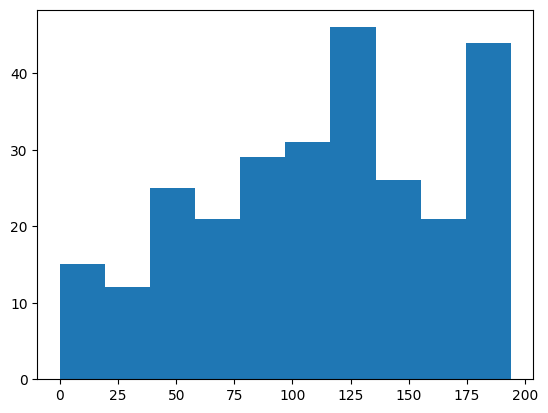

In [22]:
import matplotlib.pyplot as plt 
plt.hist(waits); 

In [23]:
Q.transitive_nodes[0].server_utilisation

0.9813030920803221

## For Many Services Business (LIKE CROMA)

In [8]:
N = ciw.create_network(
    arrival_distributions=[ciw.dists.Deterministic(value=0.2),
                           None,
                           None,
                           None,
                           None,
                           None,
                           None,
                           None,
                           None],

    service_distributions=[ciw.dists.Uniform(lower=60, upper=300),
                           ciw.dists.Uniform(lower=60, upper=600),
                           ciw.dists.Uniform(lower=2400, upper=4200),
                           ciw.dists.Uniform(lower=0, upper=1200),
                           ciw.dists.Uniform(lower=0, upper=60),
                           ciw.dists.Uniform(lower=60, upper=1200),
                           ciw.dists.Uniform(lower=2400, upper=6900),
                           ciw.dists.Uniform(lower=0, upper=600),
                           ciw.dists.Uniform(lower=0, upper=1)],
                           
    routing=[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
             [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
             [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
             [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
             [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
             [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
             [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
             [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
             [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]],

    number_of_servers=[1, 2, 2, 1, 1, 2, 3, 2, 1],

    queue_capacities=[20, 20, 20, 20, 20, 20, 20, 20, 20]
)

In [9]:
ciw.seed(1)
Q = ciw.Simulation(N)
Q.simulate_until_max_time(54000)
recs = Q.get_all_records()

blockages = [r.time_blocked for r in recs]
max(blockages)

3940.129206551108

In [10]:
rejected_stools = [r for r in recs if r.record_type=="rejection"]
[r.arrival_date for r in rejected_stools]

[4.400000000000001,
 4.600000000000001,
 4.800000000000002,
 5.000000000000002,
 5.200000000000002,
 5.400000000000002,
 5.600000000000002,
 5.8000000000000025,
 6.000000000000003,
 6.200000000000003,
 6.400000000000003,
 6.600000000000003,
 6.800000000000003,
 7.0000000000000036,
 7.200000000000004,
 7.400000000000004,
 7.600000000000004,
 7.800000000000004,
 8.000000000000004,
 8.200000000000003,
 8.400000000000002,
 8.600000000000001,
 8.8,
 9.0,
 9.2,
 9.399999999999999,
 9.599999999999998,
 9.799999999999997,
 9.999999999999996,
 10.199999999999996,
 10.399999999999995,
 10.599999999999994,
 10.799999999999994,
 10.999999999999993,
 11.199999999999992,
 11.399999999999991,
 11.59999999999999,
 11.79999999999999,
 11.99999999999999,
 12.199999999999989,
 12.399999999999988,
 12.599999999999987,
 12.799999999999986,
 12.999999999999986,
 13.199999999999985,
 13.399999999999984,
 13.599999999999984,
 13.799999999999983,
 13.999999999999982,
 14.199999999999982,
 14.39999999999998,
 1

In [ ]:
completed_custs = []
for trial in range(10):
    ciw.seed(trial)
    Q = ciw.Simulation(N)
    Q.simulate_until_max_time(900)
    recs = Q.get_all_records()
    num_completed = len([r for r in recs if r.node==9 and r.arrival_date < 900])
    completed_custs.append(num_completed)

In [ ]:
sum(completed_custs) / len(completed_custs)
